In [1]:
import pandas as pd 
import numpy as np

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

# Dataset Spain
After the 18th of May the Spanish government stopped publishing data about recovered

In [3]:
# data until 17 may
url = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/covid-19-es.csv"
# data until 31 march
url_confirmed = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/confirmed-march31.csv"
url_recovered = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/recovered-march31.csv"
url_death = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/deaths-march31.csv"

df = pd.read_csv(url, keep_date_col=True)
df = df[~df.isna().any(axis=1)].reset_index(drop=True)
df['Day'] = pd.date_range(start="2020.01.31", end="2020.05.17")
df['Day'] = pd.to_datetime(df.Day, format='%Y-%m-%d').dt.strftime('%Y.%m.%d')

df.loc[(df.Day <= "2020.03.31") & (df.Day >= "2020.02.27"), ['Death', 'Confirmed', 'Recovered']] = np.column_stack([pd.read_csv(url_death)['Spain'],
                                                                        pd.read_csv(url_confirmed)['Spain'],
                                                                        pd.read_csv(url_recovered)['Spain']])
df['Confirmed'] = df.Confirmed - df.Recovered - df.Death
df['Confirmed_smooth'] = df.Confirmed.rolling(2, min_periods=1).mean()
df['Recovered_Death'] = (df.Recovered + df.Death).diff().fillna(0) # (daily derivative)
df['Recovered_Death_smooth'] = df.Recovered_Death.rolling(2, min_periods=1).mean()

df = df[df.Day >= '2020.02.28'].reset_index(drop=True)
df.loc[0, 'Recovered_Death_smooth'] = 0.

df

,Day,Death,Confirmed,Recovered,Confirmed_smooth,Recovered_Death,Recovered_Death_smooth
0,2020.02.28,0.0,32.0,0.0,24.0,0.0,0.0
1,2020.02.29,0.0,44.0,0.0,38.0,0.0,0.0
2,2020.03.01,0.0,66.0,0.0,55.0,0.0,0.0
3,2020.03.02,0.0,114.0,0.0,90.0,0.0,0.0
4,2020.03.03,0.0,150.0,0.0,132.0,0.0,0.0
...,...,...,...,...,...,...,...
75,2020.05.13,27091.0,60777.0,140823.0,61570.0,2025.0,2019.0
76,2020.05.14,27308.0,58858.0,143374.0,59817.5,2768.0,2396.5
77,2020.05.15,27449.0,57951.0,144783.0,58404.5,1550.0,2159.0
78,2020.05.16,27549.0,56703.0,146446.0,57327.0,1763.0,1656.5


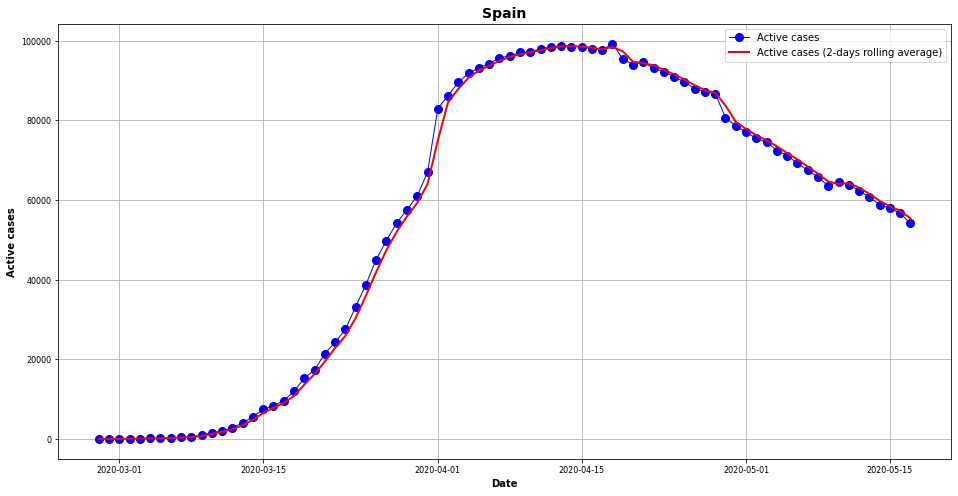

In [4]:
# save fgure with plot from january
plt.plot(pd.to_datetime(df.Day), df.Confirmed, 'bo-', lw=1, label='Active cases')
plt.plot(pd.to_datetime(df.Day), df.Confirmed_smooth, 'r', lw=2, label='Active cases (2-days rolling average)')
#ymin, ymax = plt.ylim()
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.02.28']), 0, ymax, color='r')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.03.31']), 0, ymax, color='g')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.04.18']), 0, ymax, color='r')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.title('Spain', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("active_cases_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

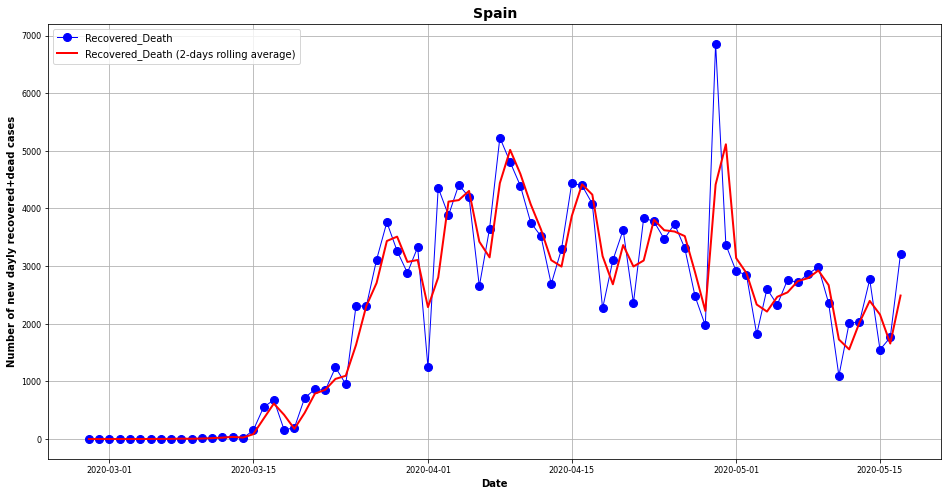

In [5]:
plt.plot(pd.to_datetime(df.Day), df.Recovered_Death, 'bo-', lw=1, label='Recovered_Death')
plt.plot(pd.to_datetime(df.Day), df.Recovered_Death_smooth, 'r', lw=2, label='Recovered_Death (2-days rolling average)')
#ymin, ymax = plt.ylim()
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.02.28']), 0, ymax, color='r')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.03.31']), 0, ymax, color='g')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.04.18']), 0, ymax, color='r')
plt.xlabel('Date')
plt.ylabel('Number of new dayly recovered+dead cases')
plt.title('Spain', weight='bold', fontsize=14)
plt.legend()
plt.grid()
plt.show()
#plt.savefig("recovered_death_data_Spain.png", quality=100, transparent=True, dpi=400)

In [6]:
# save spanish dataframe as csv
df.to_csv('../Data/dataset_esp.csv', index=False)

# Dataset Italy
The data is taken from Protezione Civile site, starting from 2020.02.24.

In [7]:
# dataset active cases
# all data from 2020-02-28 to today
url_ita = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento" + \
            "-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

df1 = pd.read_csv(url_ita)[['data', 'totale_casi', 'dimessi_guariti', 'deceduti']]
df1.columns = ['Day', 'Confirmed', 'Recovered', 'Death']
df1['Day'] = pd.to_datetime(df1.Day, format='%Y.%m.%d').dt.strftime('%Y.%m.%d')


df1['Confirmed'] = df1.Confirmed - df1.Recovered - df1.Death
df1['Confirmed_smooth'] = df1.Confirmed.rolling(7, min_periods=1).mean()
df1['Recovered_Death'] = (df1.Recovered + df1.Death).diff().fillna(0) # (daily derivative)
df1['Recovered_Death_smooth'] = df1.Recovered_Death.rolling(7, min_periods=1).mean()


df1

,Day,Confirmed,Recovered,Death,Confirmed_smooth,Recovered_Death,Recovered_Death_smooth
0,2020.02.24,221,1,7,221.000000,0.0,0.000000
1,2020.02.25,311,1,10,266.000000,3.0,1.500000
2,2020.02.26,385,3,12,305.666667,4.0,2.333333
3,2020.02.27,588,45,17,376.250000,47.0,13.500000
4,2020.02.28,821,46,21,465.200000,5.0,11.800000
...,...,...,...,...,...,...,...
483,2021.06.21,76853,4049316,127291,93164.857143,11341.0,12659.714286
484,2021.06.22,72964,4054008,127322,88458.857143,4723.0,5743.428571
485,2021.06.23,68637,4059463,127334,83713.428571,5467.0,5745.714286
486,2021.06.24,62309,4066029,127362,78527.857143,6594.0,6034.857143


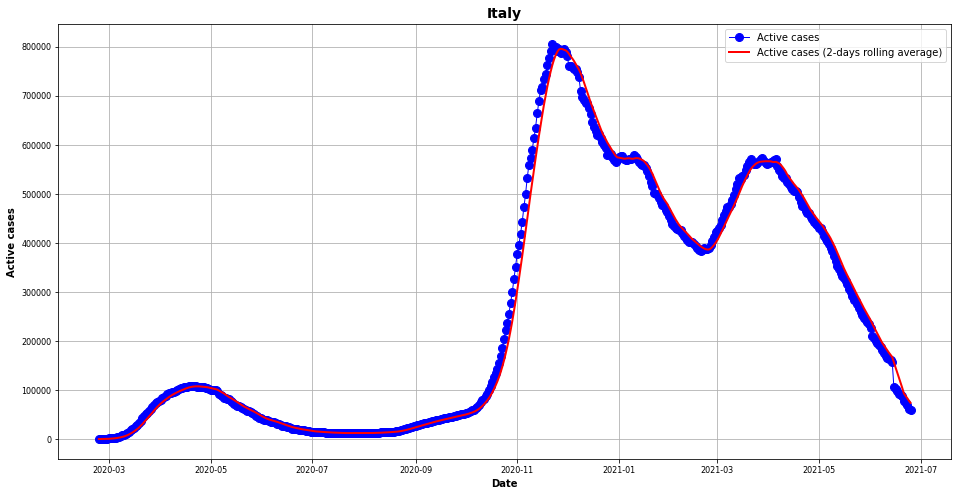

In [8]:
# save fgure with plot from january
plt.plot(pd.to_datetime(df1.Day), df1.Confirmed, 'bo-', lw=1, label='Active cases')
plt.plot(pd.to_datetime(df1.Day), df1.Confirmed_smooth, 'r', lw=2, label='Active cases (2-days rolling average)')
#ymin, ymax = plt.ylim()
#plt.vlines(pd.to_datetime(df1.Day[df1.Day == '2020.02.28']), 0, ymax, color='r')
#plt.vlines(pd.to_datetime(df1.Day[df1.Day == '2020.03.31']), 0, ymax, color='g')
#plt.vlines(pd.to_datetime(df1.Day[df1.Day == '2020.04.18']), 0, ymax, color='r')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("active_cases_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

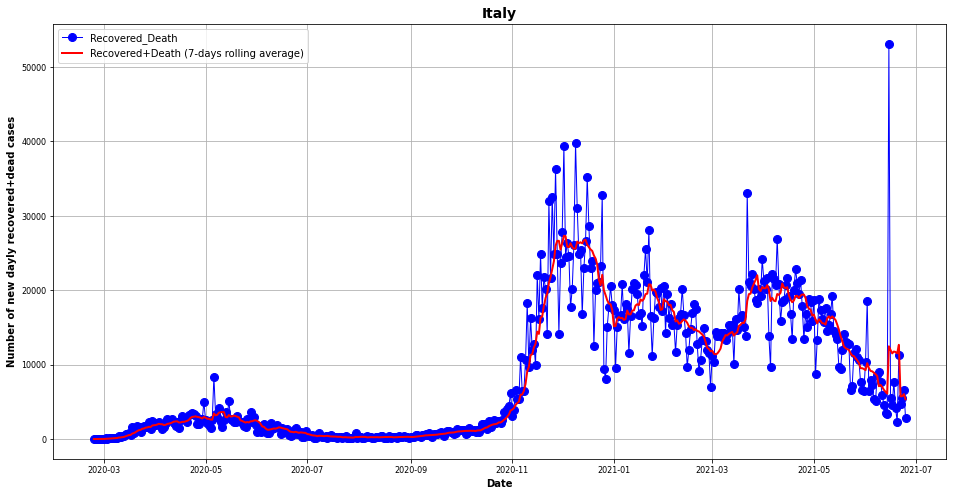

In [9]:
plt.plot(pd.to_datetime(df1.Day), df1.Recovered_Death, 'bo-', lw=1, label='Recovered_Death')
plt.plot(pd.to_datetime(df1.Day), df1.Recovered_Death_smooth, 'r', lw=2, label='Recovered+Death (7-days rolling average)')
plt.xlabel('Date')
plt.ylabel('Number of new dayly recovered+dead cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
plt.show()
#plt.savefig("recovered_death_data_Italy.png", quality=100, transparent=True, dpi=400)

In [19]:
# save italian dataframe as csv
df1.to_csv('../Data/dataset_ita.csv', index=False)